In [1]:
%pylab inline
from simulation import *
num_cores = multiprocessing.cpu_count() - 1
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import pickle, gzip
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from palettable.colorbrewer.qualitative import Set1_5,Set1_7


with gzip.open('simulation_results_q.gz','rb') as f:
    results = pickle.load(f)

Populating the interactive namespace from numpy and matplotlib


In [2]:
histograms = defaultdict(partial(np.zeros,7,dtype=int))

for h,h_result in enumerate(results):
    # these results have a single true q
    for j,result_set in enumerate(h_result):
        # each set is a single replication (should be J of these)
        for info in result_set:
            for key, val in info.items():
                best = np.argmin([v for v in val.values()])
                hvals = [v for v in val.keys()]
                histograms[(key,h,j)][best] += 1



In [8]:
criteria = ['WAIC1','WAIC2','LOO','LPPDCV2','DIC1','DIC2','AIC','BIC',  'LPD']
criteria.reverse()

pretty_labels = ['WAIC$_1$','WAIC$_2$','LOO','LPPDCV$_2$','DIC$_1$','DIC$_2$','AIC','BIC','LPD']
pretty_labels.reverse()
colors = ['#000000'] + Set1_5.hex_colors + [Set1_7.hex_colors[-1]]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  'left=%s, right=%s') % (left, right))


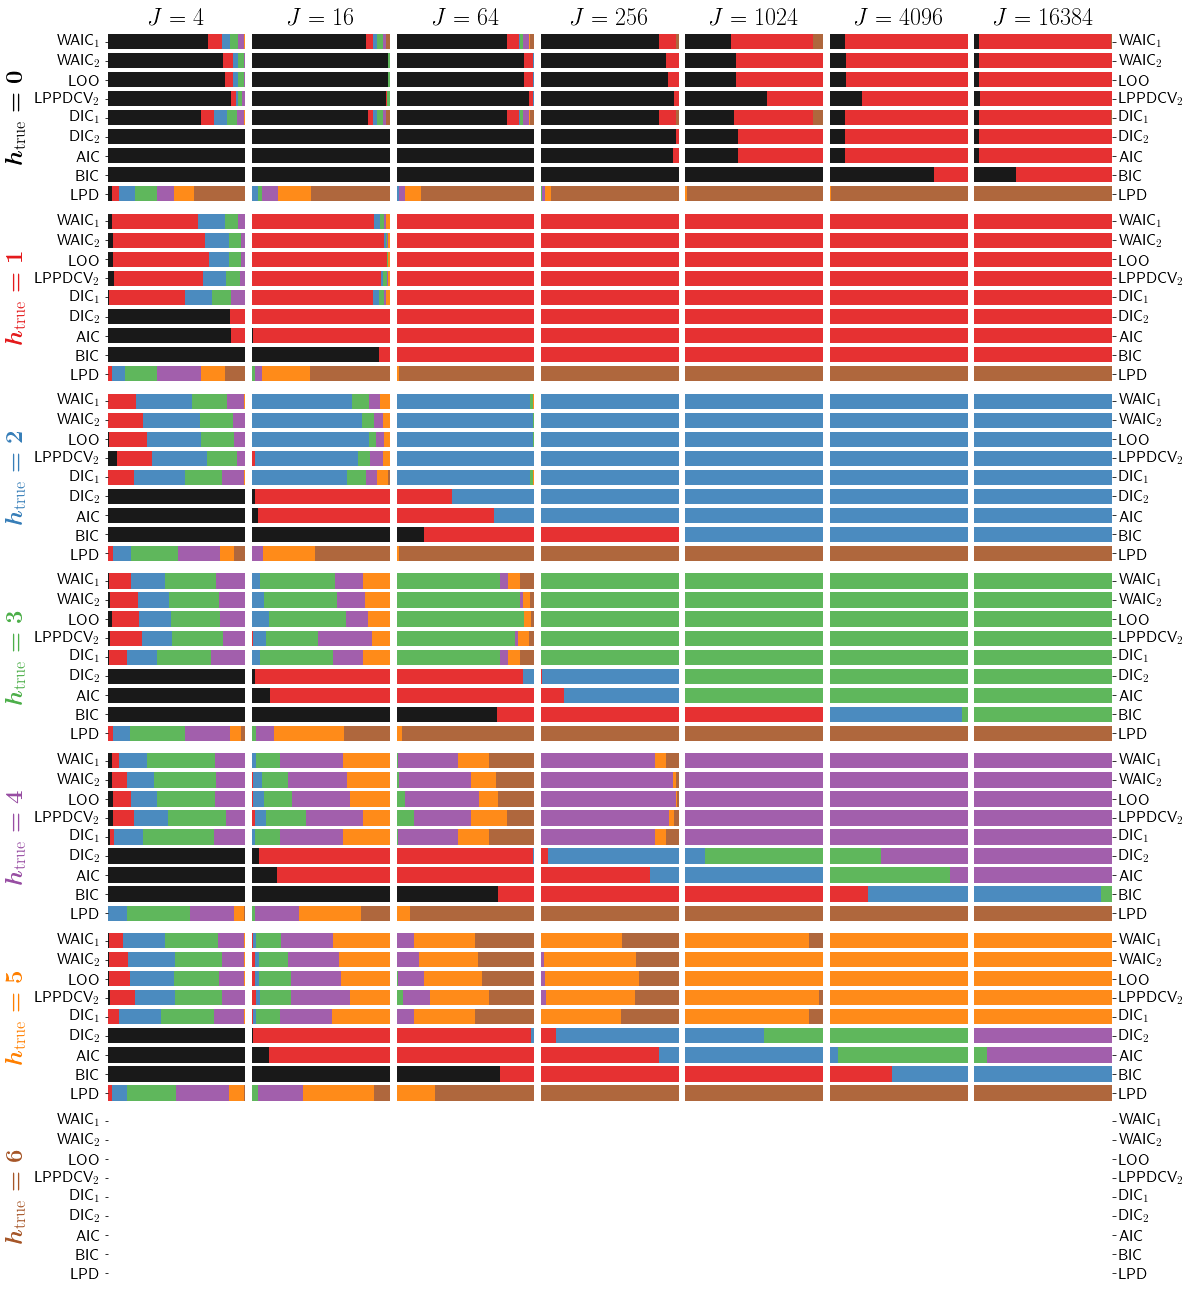

In [9]:
# histograms here
# rows: information
# columns: 2^J samples
fig = plt.figure(figsize=(18,23))
N_J = 7
N_h = 7
gs0 = gridspec.GridSpec(N_h,N_J, hspace = 0.05,wspace=0.05)
ax = []


for Q in range(N_h): # enumerate row-wise
    for J in range(N_J):
        ax+= [plt.Subplot(fig,gs0[Q,J])]
        fig.add_subplot(ax[-1])
        cumulative = np.zeros(len(criteria))
        for q in range(7):
            widths = np.array([np.sum(histograms[(quantity, Q,J)][q]) for quantity in criteria])
            N = sum(widths)
            ax[-1].barh(range(len(criteria)), widths,
                color=colors[q],align='center',alpha=0.9,left = cumulative )
            for l,w in enumerate(widths):
                # decide if we want to label some information
                if w>200:
                    ax[-1].text(cumulative[l]+w/2,l,"{0:.0f}\%".format(w/10),
                                ha="center",va="center",color='w',fontweight='black',fontsize=18)
            cumulative += widths

        ax[-1].set_xlim((0,cumulative[0]))
        ax[-1].set_xticks([])
        ax[-1].set_yticks([])
        ax[-1].spines["top"].set_visible(False)
        ax[-1].spines["right"].set_visible(False)
        ax[-1].spines["bottom"].set_visible(False)
        ax[-1].spines["left"].set_visible(False)
        ax[-1].set_ylim((-0.5,len(criteria)-.5))

        
for p in range(N_J):
    ax[p].set_title("$J=" + str(4**(p+1)) + "$",fontsize=24)
    
    
for p in range(N_h):
    ax[N_J*p].set_yticks(range(len(criteria)))
    ax[N_J*p].set_yticklabels(pretty_labels,fontsize=16)
    ax[N_J*p+N_J-1].yaxis.tick_right()
    ax[N_J*p+N_J-1].set_yticks(range(len(criteria)))
    ax[N_J*p+N_J-1].set_yticklabels(pretty_labels,fontsize=16)
    ax[N_J*p].set_ylabel(r"$\boldsymbol{h_{\textrm{true}}="+str(p)+"}$",fontsize=24,color=colors[p])

    
#plt.savefig('../figures/fig2.png',bbox_inches='tight', 
#               transparent=True,
#               pad_inches=0.15, dpi=400)
#plt.savefig('../figures/fig2.pdf',bbox_inches='tight', 
#               transparent=True,
#               pad_inches=0.15, dpi=400)